# Data Ingestion and Inspection

# Review of Pandas Dataframe

### NumPy and pandas working together  

Pandas depends upon and interoperates with NumPy, the Python library for fast numeric array computations. 
For example, you can use the DataFrame attribute .values to represent a DataFrame df as a NumPy array. 
You can also pass pandas data structures to NumPy methods. 

In this exercise, we have imported pandas as pd and loaded world population data every 10 years since 1960 
into the DataFrame df. This dataset was derived from the one used in the previous exercise.

Your job is to extract the values and store them in an array using the attribute .values. 
You'll then use those values as input into the NumPy np.log10() method to compute the base 10 logarithm of the population values. Finally, you will pass the entire pandas DataFrame into the same NumPy np.log10() method and compare the results.

In [1]:
import numpy as np
import pandas as pd

# Import data
df = pd.read_csv('datasets/world_population.csv') 

# Create array of DataFrame values: np_vals
np_vals = df.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

## Building DataFrames from scratch

### Zip lists to build a DataFrame  

In this exercise, you're going to make a pandas DataFrame of the top three countries to win gold medals since 1896 by first building a dictionary. list_keys contains the column names 'Country' and 'Total'. list_values contains the full names of each country and the number of gold medals awarded. The values have been taken from Wikipedia.

Your job is to use these lists to construct a list of tuples, use the list of tuples to construct a dictionary, and then use that dictionary to construct a DataFrame. In doing so, you'll make use of the list(), zip(), dict() and pd.DataFrame() functions. Pandas has already been imported as pd.

In [2]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
display(df)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]


,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


### Labeling your data
You can use the DataFrame attribute df.columns to view and assign new string labels to columns in a pandas DataFrame.

In this exercise, we have imported pandas as pd and defined a DataFrame df containing top Billboard hits from the 1980s (from Wikipedia). Each row has the year, artist, song name and the number of weeks at the top. However, this DataFrame has the column labels a, b, c, d. Your job is to use the df.columns attribute to re-assign descriptive column labels.

### Building DataFrames with broadcasting
You can implicitly use 'broadcasting', a feature of NumPy, when creating pandas DataFrames. In this exercise, you're going to create a DataFrame of cities in Pennsylvania that contains the city name in one column and the state name in the second. We have imported the names of 15 cities as the list cities.

Your job is to construct a DataFrame from the list of cities and the string 'PA'.

In [3]:
# Make a string with the value 'PA': state
state = 'PA'


cities = ['Manheim',
 'Preston park',
 'Biglerville',
 'Indiana',
 'Curwensville',
 'Crown',
 'Harveys lake',
 'Mineral springs',
 'Cassville',
 'Hannastown',
 'Saltsburg',
 'Tunkhannock',
 'Pittsburgh',
 'Lemasters',
 'Great bend']

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
display(df)


,state,city
0,PA,Manheim
1,PA,Preston park
2,PA,Biglerville
3,PA,Indiana
4,PA,Curwensville
5,PA,Crown
6,PA,Harveys lake
7,PA,Mineral springs
8,PA,Cassville
9,PA,Hannastown


## Importing & exporting data

### Reading a flat file  

In previous exercises, we have preloaded the data for you using the pandas function read_csv(). Now, it's your turn! Your job is to read the World Bank population data you saw earlier into a DataFrame using read_csv(). The file has been downloaded as world_population.csv.

The next step is to reread the same file, but simultaneously rename the columns using the names keyword input parameter, set equal to a list of new column labels. You will also need to set header=0 to rename the column labels.

Finish up by inspecting the result with df.head() and df.info() in the IPython Shell (changing df to the name of your DataFrame variable).

In [4]:
# Read in the file: df1
df1 = pd.read_csv('datasets/world_population.csv')

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('datasets/world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
display(df1)
display(df2)

,Year,Total Population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09
5,2010,6.924283e+09


,year,population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09
5,2010,6.924283e+09


### Delimiters, headers, and extensions  

Not all data files are clean and tidy. Pandas provides methods for reading those not-so-perfect data files that you encounter far too often.

In this exercise, you have monthly stock data for four companies downloaded from Yahoo Finance. The data is stored as one row for each company and each column is the end-of-month closing price. The file name is given to you in the variable file_messy.

In addition, this file has three aspects that may cause trouble for lesser tools: multiple header lines, comment records (rows) interleaved throughout the data rows, and space delimiters instead of commas.

Your job is to use pandas to read the data from this problematic file_messy using non-default input options with read_csv() so as to tidy up the mess at read time. Then, write the cleaned up data to a CSV file with the variable file_clean that has been prepared for you, as you might do in a real data workflow.

You can learn about the option input parameters needed by using help() on the pandas function pd.read_csv().

In [5]:
file_messy = 'datasets/messy_stock_data.tsv'
file_clean = 'datasets/tmp_clean_stock_data.csv'

# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)

# Print the output of df1.head()
display(df1.head())

# Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
display(df2.head())

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv(file_clean, index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('datasets/file_clean.xlsx', index=False)


,The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful,are they?
probably should just throw this line away too,but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec,NaN
# So that line you just read has all the column headers labels,NaN
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96,NaN


,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


## Plotting with pandas

### Plotting series using pandas
Data visualization is often a very effective first step in gaining a rough understanding of a data set to be analyzed. Pandas provides data visualization by both depending upon and interoperating with the matplotlib library. 
You will now explore some of the basic plotting mechanics with pandas as well as related matplotlib options. 

We have pre-loaded a pandas DataFrame df which contains the data you need. Your job is to use the DataFrame method df.plot() to visualize the data, and then explore the optional matplotlib input parameters that this .plot() method accepts.

The pandas .plot() method makes calls to matplotlib to construct the plots. This means that you can use the skills you've learned in previous visualization courses to customize the plot. In this exercise, you'll add a custom title and axis labels to the figure.


,state,city
0,PA,Manheim
1,PA,Preston park
2,PA,Biglerville
3,PA,Indiana
4,PA,Curwensville


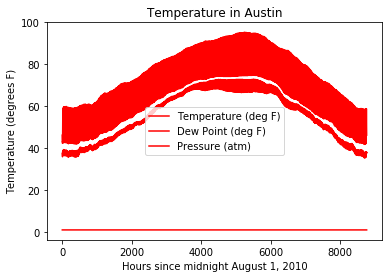

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a list of the new column labels: new_labels
new_labels = ['Temperature (deg F)','Dew Point (deg F)','Pressure (atm)', 'Date']

display(df.head())

# Load data
df = pd.read_csv('datasets/weather_data_austin_2010.csv', header=0, names=new_labels)

# Create a plot with color='red'
df.plot(color='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()


### Plotting DataFrames
Comparing data from several columns can be very illuminating. Pandas makes doing so easy with multi-column DataFrames. 
By default, calling df.plot() will cause pandas to over-plot all column data, with each column as a single line. In this exercise, we have pre-loaded three columns of data from a weather data set - temperature, dew point, and pressure - but the problem is that pressure has different units of measure. The pressure data, measured in Atmospheres, has a different vertical scaling than that of the other two data columns, which are both measured in degrees Fahrenheit.

Your job is to plot all columns as a multi-line plot, to see the nature of vertical scaling problem. Then, use a list of column names passed into the DataFrame df[column_list] to limit plotting to just one column, and then just 2 columns of data.

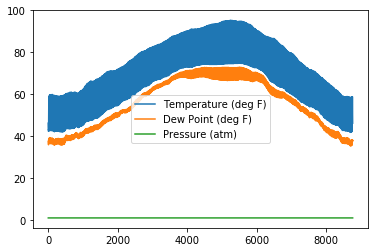

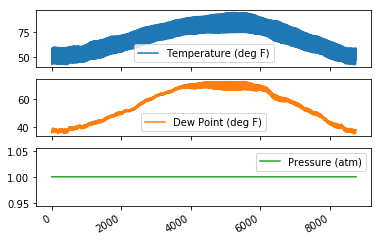

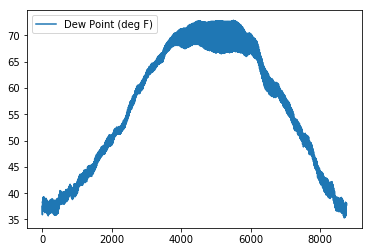

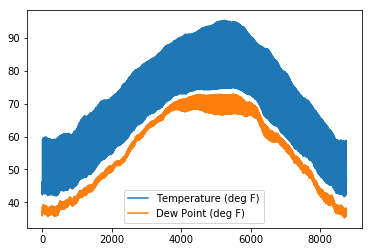

In [7]:
# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

# Plot just the Dew Point data
column_list1 = ['Dew Point (deg F)']
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature (deg F)','Dew Point (deg F)']
df[column_list2].plot()
plt.show()

# Exploratory data analysis

## Visual exploratory data analysis

### pandas line plots
In the previous chapter, you saw that the .plot() method will place the Index values on the x-axis by default. In this exercise, you'll practice making line plots with specific columns on the x and y axes.

You will work with a dataset consisting of monthly stock prices in 2015 for AAPL, GOOG, and IBM. The stock prices were obtained from Yahoo Finance. Your job is to plot the 'Month' column on the x-axis and the AAPL and IBM prices on the y-axis using a list of column names.

,Month,AAPL,GOOG,IBM
0,Jan,117.160004,531.594604,153.309998
1,Feb,128.460007,555.343933,161.940002
2,Mar,124.430000,545.000854,160.500000
3,Apr,125.150002,537.340027,171.289993
4,May,130.279999,532.109985,169.649994
5,Jun,125.430000,520.510010,162.660004
6,Jul,121.300003,625.609985,161.990005
7,Aug,112.919998,637.609985,147.889999
8,Sep,110.300003,608.419983,144.970001
9,Oct,119.500000,710.809998,140.080002


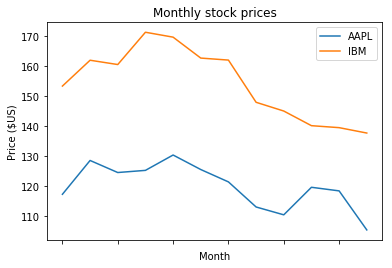

In [8]:
df = pd.read_csv('datasets/stocks.csv')

display(df)

# Create a list of y-axis column names: y_columns
y_columns = ['AAPL', 'IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

### pandas scatter plots
Pandas scatter plots are generated using the kind='scatter' keyword argument. Scatter plots require that the `x` and `y` columns be chosen by specifying the x and y parameters inside `.plot()`. Scatter plots also take an `s` keyword argument to provide the radius of each circle to plot in pixels.

In this exercise, you're going to plot fuel efficiency (miles-per-gallon) versus horse-power for 392 automobiles manufactured from 1970 to 1982 from the UCI Machine Learning Repository.

The size of each circle is provided as a NumPy array called `sizes`. This array contains the normalized `'weight'` of each automobile in the dataset.

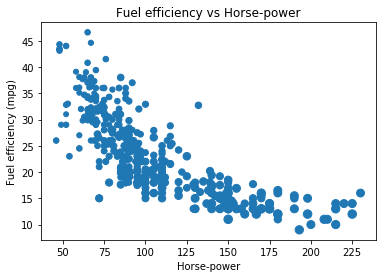

In [9]:
df = pd.read_csv('datasets/auto-mpg.csv')

# The size of each circle is provided as a NumPy array called sizes. 
# This array contains the normalized 'weight' of each automobile in the dataset.
from numpy import linalg as LA

sizes = df.weight.values/df.weight.values.max()*75

# Generate a scatter plot with 'hp' on the x-axis and 'mpg' on the y-axis. Specify s=sizes.
df.plot(kind='scatter', x='hp', y='mpg', s=sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()


### pandas box plots
While pandas can plot multiple columns of data in a single figure, making plots that share the same x and y axes, there are cases where two columns cannot be plotted together because their units do not match. The `.plot()` method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

In this exercise your job is to generate box plots for fuel efficiency (mpg) and weight from the automobiles data set. To do this in a single figure, you'll specify `subplots=True` inside `.plot()` to generate two separate plots.

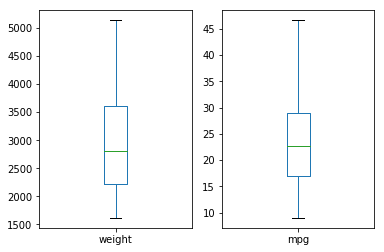

In [10]:
# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots
df[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

### pandas hist, pdf and cdf
Pandas relies on the .hist() method to not only generate histograms, but also plots of probability density functions (PDFs) and cumulative density functions (CDFs).

In this exercise, you will work with a dataset consisting of restaurant bills that includes the amount customers tipped.

The original dataset is provided by the Seaborn package.

Your job is to plot a PDF and CDF for the `fraction` column of the tips dataset. This column contains information about what fraction of the total bill is comprised of the tip.

Remember, when plotting the PDF, you need to specify `normed=True` in your call to `.hist()`, and when plotting the CDF, you need to specify `cumulative=True` in addition to `normed=True`.

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


C:\Users\Jacob\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


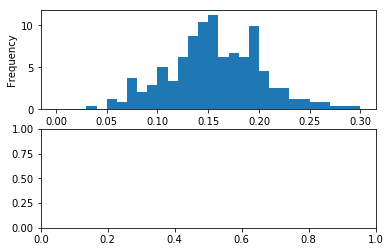

C:\Users\Jacob\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


In [11]:
import seaborn as sns

df = sns.load_dataset("tips")
df['fraction'] = df.tip/df.total_bill
display(df.head())

# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF for the values in fraction with 30 bins between 0 and 30%. 
# ax=axes[0] means that this plot will appear in the first row.
df.fraction.plot(ax=axes[0], kind='hist', bins=30, normed=True, range=(0,.3))
plt.show()

# Plot the CDF for the values in fraction with 30 bins between 0 and 30%. 
# To make the CDF appear on the second row, you need to specify ax=axes[1].
df.fraction.plot(ax=axes[1], kind='hist', bins=30, normed=True, cumulative=True, range=(0,.3))
plt.show()


## Statistical exploratory data analysis

### Bachelor's degrees awarded to women
In this exercise, you will investigate statistics of the percentage of Bachelor's degrees awarded to women from 1970 to 2011. Data is recorded every year for 17 different fields. This data set was obtained from the Digest of Education Statistics.

Your job is to compute the minimum and maximum values of the 'Engineering' column and generate a line plot of the mean value of all 17 academic fields per year. To perform this step, you'll use the .mean() method with the keyword argument axis='columns'. This computes the mean across all columns per row.

0.8
19.0


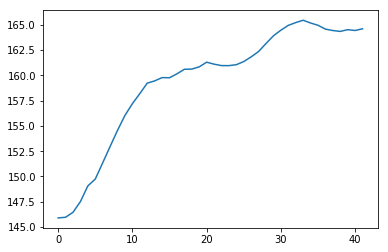

In [12]:
df = pd.read_csv('datasets/percent-bachelors-degrees-women-usa.csv')

# Print the minimum value of the Engineering column
print(df.Engineering.min())

# Print the maximum value of the Engineering column
print(df.Engineering.max())

# Construct the mean (a.k.a. average) percentage per year: mean
mean = df.mean(axis='columns')

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()


### Median vs mean
In many data sets, there can be large differences in the mean and median value due to the presence of outliers.

In this exercise, you'll investigate the mean, median, and max fare prices paid by passengers on the Titanic and generate a box plot of the fare prices. This data set was obtained from Vanderbilt University.

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


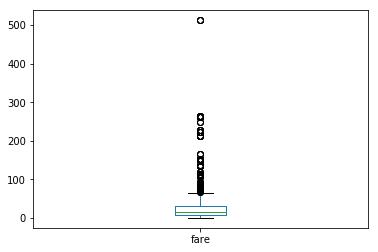

In [13]:
df = pd.read_csv('datasets/titanic.csv')

# Print summary statistics of the fare column with .describe()
print(df.fare.describe())

# Generate a box plot of the fare column
df.fare.plot(kind='box')

# Show the plot
plt.show()

### Quantiles
In this exercise, you'll investigate the probabilities of life expectancy in countries around the world. This dataset contains life expectancy for persons born each year from 1800 to 2015. Since country names change or results are not reported, not every country has values. This dataset was obtained from Gapminder.

First, you will determine the number of countries reported in 2015. There are a total of 260 unique countries in the entire dataset. Then, you will compute the 5th and 95th percentiles of life expectancy over the entire dataset. Finally, you will make a box plot of life expectancy every 50 years from 1800 to 2000. Notice the large change in the distributions over this period.

,Unnamed: 0,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


208


,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0.05,12.95,25.40,25.30,25.20,25.2,25.2,25.40,25.40,25.40,25.3,...,53.07,53.60,54.235,54.935,55.97,56.335,56.705,56.87,57.855,59.2555
0.95,246.05,37.92,37.35,38.37,38.0,38.3,38.37,38.37,38.37,38.0,...,80.73,80.93,81.200,81.365,81.60,81.665,81.830,82.00,82.100,82.1650


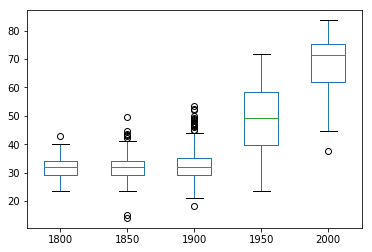

In [14]:
df = pd.read_csv('datasets/life_expectancy_at_birth.csv')

display(df.head())

# Print the number of countries reported in 2015
print(df['2015'].count())

# Print the 5th and 95th percentiles
display(df.quantile([0.05, 0.95]))

# Generate a box plot
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()


### Standard deviation of temperature
Let's use the mean and standard deviation to explore differences in temperature distributions in Pittsburgh in 2013. The data has been obtained from Weather Underground.

In this exercise, you're going to compare the distribution of daily temperatures in January and March. You'll compute the mean and standard deviation for these two months. You will notice that while the mean values are similar, the standard deviations are quite different, meaning that one month had a larger fluctuation in temperature than the other.

In [15]:
january = pd.read_csv('datasets/january.csv')

march = pd.read_csv('datasets/march.csv')

# Print the mean of the January and March data
print(january.mean(), march.mean())

# Print the standard deviation of the January and March data
print(january.std(), march.std())


Temperature    32.354839
dtype: float64 Temperature    35.0
dtype: float64
Temperature    13.583196
dtype: float64 Temperature    7.478859
dtype: float64


## Separating populations with Boolean indexing

### Separate and summarize
Let's use population filtering to determine how the automobiles in the US differ from the global average and standard deviation. How does the distribution of fuel efficiency (MPG) for the US differ from the global average and standard deviation?

In this exercise, you'll compute the means and standard deviations of all columns in the full automobile dataset. Next, you'll compute the same quantities for just the US population and subtract the global values from the US values.

In [16]:
df = pd.read_csv('datasets/auto-mpg.csv')

# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = df.mean()
global_std = df.std()

# Filter the US population from the origin column: us
us = df[df.origin == 'US']

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
display(us_mean - global_mean)
display(us_std - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64

mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64

### Separate and plot
Population filtering can be used alongside plotting to quickly determine differences in distributions between the sub-populations. You'll work with the Titanic dataset.

There were three passenger classes on the Titanic, and passengers in each class paid a different fare price. In this exercise, you'll investigate the differences in these fare prices.

Your job is to use Boolean filtering and generate box plots of the fare prices for each of the three passenger classes. The fare prices are contained in the 'fare' column and passenger class information is contained in the 'pclass' column.

When you're done, notice the portions of the box plots that differ and those that are similar.

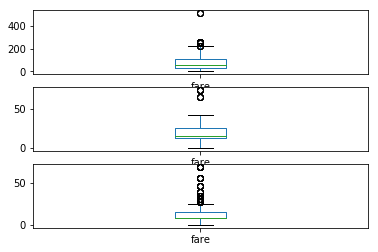

In [17]:
titanic = pd.read_csv('datasets/titanic.csv')

# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')

# Display the plot
plt.show()

# Time series in pandas

## Indexing pandas time series

### Creating and using a DatetimeIndex
The pandas Index is a powerful way to handle time series data, so it is valuable to know how to build one yourself. Pandas provides the `pd.to_datetime()` function for just this task. For example, if passed the list of strings `['2015-01-01 091234','2015-01-01 091234']` and a format specification variable, such as `format='%Y-%m-%d %H%M%S`, pandas will parse the string into the proper datetime elements and build the datetime objects.

In this exercise, a list of temperature data and a list of date strings has been pre-loaded for you as temperature_list and date_list respectively. Your job is to use the .to_datetime() method to build a DatetimeIndex out of the list of date strings, and to then use it along with the list of temperature data to build a pandas Series.

In [18]:
date_list=[
 '20100101 00:00',
 '20100101 01:00',
 '20100101 02:00',
 '20100101 03:00',
 '20100101 04:00',
 '20100101 05:00',
 '20100101 06:00',
 '20100101 07:00',
 '20100101 08:00',
 '20100101 09:00',
 '20100101 10:00',
 '20100101 11:00',
 '20100101 12:00',
 '20100101 13:00',
 '20100101 14:00',
 '20100101 15:00',
 '20100101 16:00',
 '20100101 17:00',
 '20100101 18:00',
 '20100101 19:00',
 '20100101 20:00',
 '20100101 21:00',
 '20100101 22:00',
 '20100101 23:00',
 '20100102 00:00',
 '20100102 01:00']

temperature_list = [
 46.2,
 44.6,
 44.1,
 43.8,
 43.5,
 43.0,
 43.1,
 42.3,
 42.5,
 45.9,
 49.4,
 52.4,
 54.9,
 57.1,
 58.4,
 59.1,
 59.1,
 58.0,
 54.5,
 51.3,
 49.2,
 48.1,
 47.2,
 46.4,
 46.5,
 44.9]

# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)

display(time_series)


2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
2010-01-01 05:00:00    43.0
2010-01-01 06:00:00    43.1
2010-01-01 07:00:00    42.3
2010-01-01 08:00:00    42.5
2010-01-01 09:00:00    45.9
2010-01-01 10:00:00    49.4
2010-01-01 11:00:00    52.4
2010-01-01 12:00:00    54.9
2010-01-01 13:00:00    57.1
2010-01-01 14:00:00    58.4
2010-01-01 15:00:00    59.1
2010-01-01 16:00:00    59.1
2010-01-01 17:00:00    58.0
2010-01-01 18:00:00    54.5
2010-01-01 19:00:00    51.3
2010-01-01 20:00:00    49.2
2010-01-01 21:00:00    48.1
2010-01-01 22:00:00    47.2
2010-01-01 23:00:00    46.4
2010-01-02 00:00:00    46.5
2010-01-02 01:00:00    44.9
dtype: float64

### Partial string indexing and slicing
Pandas time series support "partial string" indexing. What this means is that even when passed only a portion of the datetime, such as the date but not the time, pandas is remarkably good at doing what one would expect. Pandas datetime indexing also supports a wide variety of commonly used datetime string formats, even when mixed.

In this exercise, a time series that contains hourly weather data has been pre-loaded for you. This data was read using the parse_dates=True option in read_csv() with index_col="Dates" so that the Index is indeed a DatetimeIndex.

All data from the 'Temperature' column has been extracted into the variable ts0. Your job is to use a variety of natural date strings to extract one or more values from ts0.

In [20]:
ts1 = time_series.loc['2010-01-01 00:00:00':'2010-01-01 05:00:00']
display(ts1)

ts2 = time_series.loc['2010-01-01 12:00:00']
display(ts2)



2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
2010-01-01 05:00:00    43.0
dtype: float64

54.9

### Reindexing the Index
Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with NaN by default.

In this exercise, two time series data sets containing daily data have been pre-loaded for you, each indexed by dates. The first, ts1, includes weekends, but the second, ts2, does not. The goal is to combine the two data sets in a sensible way. Your job is to reindex the second data set so that it has weekends as well, and then add it to the first. When you are done, it would be informative to inspect your results.

In [21]:
ts1 = pd.DataFrame.from_dict({'2016-07-01':0,
'2016-07-02':1,
'2016-07-03':2,
'2016-07-04':3,
'2016-07-05':4,
'2016-07-06':5,
'2016-07-07':6,
'2016-07-08':7,
'2016-07-09':8,
'2016-07-10':9,
'2016-07-11':10,
'2016-07-12':11,
'2016-07-13':12,
'2016-07-14':13,
'2016-07-15':14,
'2016-07-16':15,
'2016-07-17':16}, orient='index')

display(ts1.head())

ts2 = pd.DataFrame.from_dict({'2016-07-01':0,
'2016-07-04':1,
'2016-07-05':2,
'2016-07-06':3,
'2016-07-07':4,
'2016-07-08':5,
'2016-07-11':6,
'2016-07-12':7,
'2016-07-13':8,
'2016-07-14':9,
'2016-07-15':10}, orient='index')

display(ts2.head())

# Create a new time series ts3 by reindexing ts2 with the index of ts1
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)
display(ts3)

# Create another new time series, ts4, by calling the same .reindex() as above,
# but also specifiying a fill method, using the keyword argument method="ffill" to forward-fill values.
# Reindex with fill method, using forward fill: ts4

#ts4 = ts2.reindex(ts1.index, method='ffill')
#display(ts4)

# Combine ts1 + ts2: sum12
sum12 = ts1+ts2
display(sum12)

# Combine ts1 + ts3: sum13
sum13 = ts1+ts3
display(sum13)

# Combine ts1 + ts4: sum14

#sum14 = ts1+ts4
#display(sum14)


,0
2016-07-01,0
2016-07-02,1
2016-07-03,2
2016-07-04,3
2016-07-05,4


,0
2016-07-01,0
2016-07-04,1
2016-07-05,2
2016-07-06,3
2016-07-07,4


,0
2016-07-01,0.0
2016-07-02,NaN
2016-07-03,NaN
2016-07-04,1.0
2016-07-05,2.0
2016-07-06,3.0
2016-07-07,4.0
2016-07-08,5.0
2016-07-09,NaN
2016-07-10,NaN


,0
2016-07-01,0.0
2016-07-02,NaN
2016-07-03,NaN
2016-07-04,4.0
2016-07-05,6.0
2016-07-06,8.0
2016-07-07,10.0
2016-07-08,12.0
2016-07-09,NaN
2016-07-10,NaN


,0
2016-07-01,0.0
2016-07-02,NaN
2016-07-03,NaN
2016-07-04,4.0
2016-07-05,6.0
2016-07-06,8.0
2016-07-07,10.0
2016-07-08,12.0
2016-07-09,NaN
2016-07-10,NaN


## Resampling pandas time series

### Resampling and frequency
Pandas provides methods for resampling time series data. When downsampling or upsampling, the syntax is similar, but the methods called are different. Both use the concept of 'method chaining' - `df.method1().method2().method3()` - to direct the output from one method call to the input of the next, and so on, as a sequence of operations, one feeding into the next.

For example, if you have hourly data, and just need daily data, pandas will not guess how to throw out the 23 of 24 points. You must specify this in the method. One approach, for instance, could be to take the mean, as in `df.resample('D').mean()`.

In [22]:
df = pd.read_csv('datasets/weather_data_austin_2010.csv', index_col=3, parse_dates=[3])
display(df.info())
display(df.head())

# Downsample to 6 hour data and aggregate by mean: df1
df1 = df.Temperature.resample('6h').mean()
display(df1.head())

# Downsample to daily data and count the number of data points: df2
df2 = df.Temperature.resample('D').count()
display(df2.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


None

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

### Separating and resampling
With pandas, you can resample in different ways on different subsets of your data. For example, resampling different months of data with different aggregations.

In [23]:
# Use partial string indexing to extract temperature data for August 2010 into august.
august = df.Temperature['2010-8']

# Use the temperature data for August and downsample to find the daily maximum temperatures. 
august_highs = august.resample('D').max()
display(august_highs.head())

# Use the temperature data for February and downsample to find the daily minimum temperatures. 
february = df.Temperature['2010-2']
february_lows = february.resample('D').min()
display(february_lows.head())

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
Freq: D, Name: Temperature, dtype: float64

### Rolling mean and frequency
In this exercise, some hourly weather data is pre-loaded for you. You will continue to practice resampling, this time using rolling means.

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. You can read more about them here.

To use the `.rolling()` method, you must always use method chaining, first calling `.rolling()` and then chaining an aggregation method after it. For example, with a Series `hourly_data, hourly_data.rolling(window=24).mean()` would compute new values for each hourly point, based on a 24-hour window stretching out behind each point. The frequency of the output data is the same: it is still hourly. Such an operation is useful for smoothing time series data.

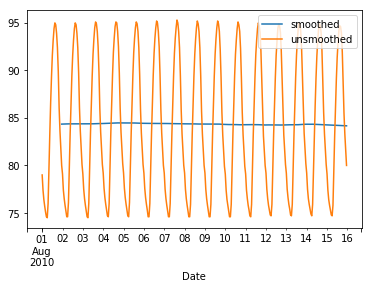

In [24]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-Aug-01':'2010-Aug-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()


### Resample and roll with it
As of pandas version 0.18.0, the interface for applying rolling transformations to time series has become more consistent and flexible, and feels somewhat like a groupby (If you do not know what a groupby is, don't worry, you will learn about it in the next course!).

You can now flexibly chain together resampling and rolling operations. In this exercise, the same weather data from the previous exercises has been pre-loaded for you. Your job is to extract one month of data, resample to find the daily high temperatures, and then use a rolling and aggregation operation to smooth the data.

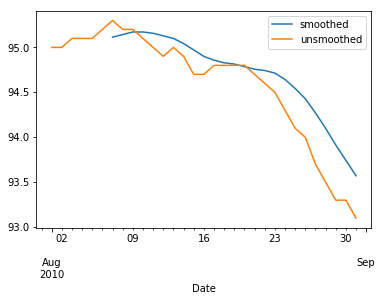

In [25]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-8']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()

df_pl = pd.DataFrame({'smoothed':daily_highs_smoothed, 'unsmoothed':daily_highs})
df_pl.plot()
plt.show()


## Manipulating pandas time series

### Method chaining and filtering
We've seen that pandas supports method chaining. This technique can be very powerful when cleaning and filtering data.

In [26]:
df = pd.read_csv('datasets/austin_airport_departure_data_2015_july.csv', skiprows=15, index_col=1, parse_dates=[1])

df = df.iloc[:, 0:16]
display(df.head())

# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip(' ')

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()
display(stats)


,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0


count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64

### Missing values and interpolation
One common application of interpolation in data analysis is to fill in missing data.

In this exercise, noisy measured data that has some dropped or otherwise missing values has been loaded. The goal is to compare two time series, and then look at summary statistics of the differences. The problem is that one of the data sets is missing data at some of the times. The pre-loaded data ts1 has value for all times, yet the data set ts2 does not: it is missing data for the weekends.

Your job is to first interpolate to fill in the data for all days. Then, compute the differences between the two data sets, now that they both have full support for all times. Finally, generate the summary statistics that describe the distribution of differences.

In [27]:
ts1 = pd.DataFrame.from_dict({
'2016-07-01':0,
'2016-07-02':1,
'2016-07-03':2,
'2016-07-04':3,
'2016-07-05':4,
'2016-07-06':5,
'2016-07-07':6,
'2016-07-08':7,
'2016-07-09':8,
'2016-07-10':9,
'2016-07-11':10,
'2016-07-12':11,
'2016-07-13':12,
'2016-07-14':13,
'2016-07-15':14,
'2016-07-16':15,
'2016-07-17':16
}, orient='index')

ts2 = pd.DataFrame.from_dict({
'2016-07-01':0,
'2016-07-04':1,
'2016-07-05':2,
'2016-07-06':3,
'2016-07-07':4,
'2016-07-08':5,
'2016-07-11':6,
'2016-07-12':7,
'2016-07-13':8,
'2016-07-14':9,
'2016-07-15':10
}, orient='index')


# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how='linear')

# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts1-ts2_interp)

# Generate and print summary statistics of the differences
print(differences.describe())



               0
count  17.000000
mean    2.882353
std     1.585267
min     0.000000
25%     2.000000
50%     2.666667
75%     4.000000
max     6.000000


### Time zones and conversion
Time zone handling with pandas typically assumes that you are handling the Index of the Series. In this exercise, you will learn how to handle timezones that are associated with datetimes in the column data, and not just the Index.

You will work with the flight departure dataset again, and this time you will select Los Angeles ('LAX') as the destination airport.

In [28]:
df = pd.read_csv('datasets/austin_airport_departure_data_2015_july.csv', skiprows=15)
df = df.iloc[:, 0:16]
display(df.info())

# Create a Boolean mask, mask, such that if the 'Destination Airport' column of df equals 'LAX', the result is True, 
# and otherwise, it is False.
mask = df['Destination Airport '] == 'LAX'

# Use the mask to subset the data: la
la = df[mask]
display(la.head())

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime( la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'] )
display(times_tz_none.head())

# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')
display(times_tz_central.head())

# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')
display(times_tz_pacific.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 16 columns):
  Carrier Code                            1741 non-null object
Date (MM/DD/YYYY)                         1740 non-null object
Flight Number                             1740 non-null float64
Tail Number                               1740 non-null object
Destination Airport                       1740 non-null object
Scheduled Departure Time                  1740 non-null object
Actual Departure Time                     1740 non-null object
Scheduled Elapsed Time(Minutes)           1740 non-null float64
Actual Elapsed Time(Minutes)              1740 non-null float64
Departure Delay(Minutes)                  1740 non-null float64
Wheels-off Time                           1740 non-null object
Taxi-out Time(Minutes)                    1740 non-null float64
DelayCarrier(Minutes)                     1740 non-null float64
DelayWeather(Minutes)                     1740 non-null float64
Dela

None

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes)
33,WN,07/01/2015,1249.0,N430WN,LAX,05:30,05:29,185.0,173.0,-1.0,05:43,14.0,0.0,0.0,0.0,0.0
55,WN,07/01/2015,4924.0,N757LV,LAX,16:00,16:15,185.0,169.0,15.0,16:27,12.0,0.0,0.0,0.0,0.0
91,WN,07/02/2015,1249.0,N570WN,LAX,05:30,05:38,185.0,171.0,8.0,05:47,9.0,0.0,0.0,0.0,0.0
113,WN,07/02/2015,4924.0,N379SW,LAX,16:00,16:07,185.0,173.0,7.0,16:23,16.0,0.0,0.0,0.0,0.0
134,WN,07/03/2015,1249.0,N487WN,LAX,05:10,05:16,185.0,174.0,6.0,05:30,14.0,0.0,0.0,0.0,0.0


33    2015-07-01 05:43:00
55    2015-07-01 16:27:00
91    2015-07-02 05:47:00
113   2015-07-02 16:23:00
134   2015-07-03 05:30:00
dtype: datetime64[ns]

33    2015-07-01 05:43:00-05:00
55    2015-07-01 16:27:00-05:00
91    2015-07-02 05:47:00-05:00
113   2015-07-02 16:23:00-05:00
134   2015-07-03 05:30:00-05:00
dtype: datetime64[ns, US/Central]

33    2015-07-01 03:43:00-07:00
55    2015-07-01 14:27:00-07:00
91    2015-07-02 03:47:00-07:00
113   2015-07-02 14:23:00-07:00
134   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]

## Visualizing pandas time series

### Plotting time series, datetime indexing
Pandas handles datetimes not only in your data, but also in your plotting.

In this exercise, some time series data has been pre-loaded. However, we have not parsed the date-like columns nor set the index, as we have done for you in the past!

The plot displayed is how pandas renders data with the default integer/positional index. Your job is to convert the `'Date'` column from a collection of strings into a collection of datetime objects. Then, you will use this converted `'Date'` column as your new index, and re-plot the data, noting the improved datetime awareness. 

Before proceeding, look at the plot shown and observe how pandas handles data with the default integer index. Then, inspect the DataFrame df using the .head() method in the IPython Shell to get a feel for its structure.

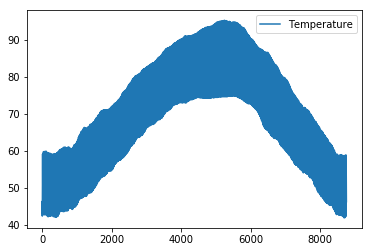

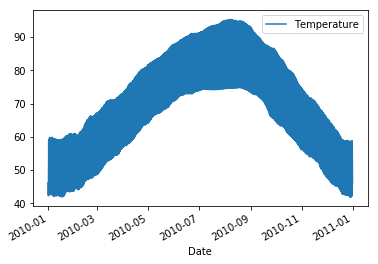

In [29]:
df = pd.read_csv('datasets/weather_data_austin_2010.csv', usecols=['Temperature','Date'])
# Plot the raw data before setting the datetime index
df.plot()
plt.show()

# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df.Date)

# Set the index to be the converted 'Date' column
df.set_index('Date', inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot()
plt.show()


### Plotting date ranges, partial indexing
Now that you have set the DatetimeIndex in your DataFrame, you have a much more powerful and flexible set of tools to use when plotting your time series data. Of these, one of the most convenient is partial string indexing and slicing. In this exercise, we've pre-loaded a full year of Austin 2010 weather data, with the index set to be the datetime parsed `'Date'` column as shown in the previous exercise.

Your job is to use partial string indexing of the dates, in a variety of datetime string formats, to plot all the summer data and just one week of data together. 

First, remind yourself how to extract one month of temperature data using `'May 2010'` as a key into `df.Temperature[]`, and call `head()` to inspect the result: `df.Temperature['May 2010'].head()`.

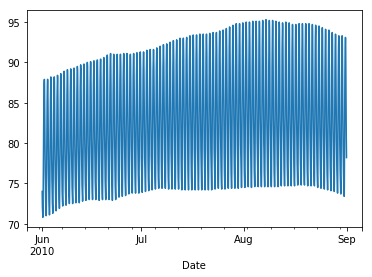

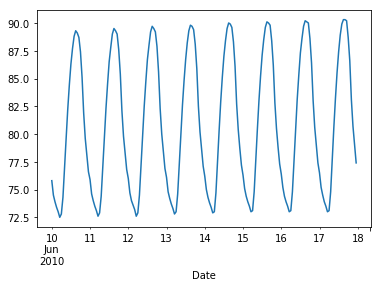

<Figure size 432x288 with 0 Axes>

In [82]:
# Plot the summer temperatures using method chaining. The summer ranges from the months '2010-Jun' to '2010-Aug'.
df.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()

# Plot the temperatures for one week in June using the same method chaining, but this time indexing with '2010-06-10':'2010-06-17' 
# before you follow up with .plot().
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()


# Case Study - Sunlight in Austin

## Reading and Cleaning the Data

### Reading a Data File

In [83]:

# Read in the data file: df
df = pd.read_csv('datasets/NOAA_QCLCD_2011_hourly_13904.txt')

# Print the output of df.head()
display(df.head())

# Read in the data file with header=None: df_headers
df_headers = pd.read_csv('datasets/NOAA_QCLCD_2011_hourly_13904.txt', header=None)

# Print the output of df_headers.head()
display(df_headers.head())


,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


### Re-assigning column names
After the initial step of reading in the data, the next step is to clean and tidy it so that it is easier to work with.

In this exercise, you will begin this cleaning process by re-assigning column names and dropping unnecessary columns.

In [84]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']


# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis='columns')

# Print the output of df_dropped.head()
display(df_dropped.head())


,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
1,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
3,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04
4,13904,20110101,553,12,BKN065,10.00,49,9.4,37,2.8,17,-8.3,28,6,010,29.53,30.06


### Cleaning and tidying datetime data
In order to use the full power of pandas time series, you must construct a DatetimeIndex. To do so, it is necessary to clean and transform the date and time columns.

In [85]:
# Convert the 'date' column to a string with .astype(str) and assign to df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Add leading zeros to the 'Time' column.
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

#Concatenate the new 'date' and 'Time' columns together. Assign to date_string
date_string = df_dropped.date+df_dropped.Time

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
display(df_clean.head())

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04
2011-01-01 05:53:00,13904,20110101,0553,12,BKN065,10.00,49,9.4,37,2.8,17,-8.3,28,6,010,29.53,30.06


### Cleaning the numeric columns
The numeric columns contain missing values labeled as 'M'. In this exercise, your job is to transform these columns such that they contain only numeric values and interpret missing data as NaN.

The pandas function `pd.to_numeric()` is ideal for this purpose: It converts a Series of values to floating-point values. Furthermore, by specifying the keyword argument `errors='coerce'`, you can force strings like `'M'` to be interpreted as `NaN`.

In [86]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
display(df_clean.loc['2011-6-20 8:00':'2011-6-20 9:00', 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
display(df_clean.loc['2011-6-20 8:00':'2011-6-20 9:00', 'dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64

## Statistical exploratory data analysis

### Signal min, max, median
Now that you have the data read and cleaned, you can begin with statistical EDA. First, you will analyze the 2011 Austin weather data.

Your job in this exercise is to analyze the `'dry_bulb_faren'` column and print the median temperatures for specific time ranges. You can do this using partial datetime string selection.

In [87]:
# Print the median of the dry_bulb_faren column
print(df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


### Signal variance
You're now ready to compare the 2011 weather data with the 30-year normals reported in 2010. You can ask questions such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?

Your job is to first resample `df_clean` and `df_climate` by day and aggregate the mean temperatures. You will then extract the temperature related columns from each - `'dry_bulb_faren'` in `df_clean`, and `'Temperature'` in `df_climate` - as NumPy arrays and compute the difference.

Notice that the indexes of `df_clean` and `df_climate` are not aligned - `df_clean` has dates in 2011, while `df_climate` has dates in 2010. This is why you extract the temperature columns as NumPy arrays. An alternative approach is to use the pandas .reset_index() method to make sure the Series align properly. You will practice this approach as well.

In [88]:
df_climate = pd.read_csv('datasets/weather_data_austin_2010.csv', index_col=3, parse_dates=[3])

# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())




1.3300839215698725


### Sunny or cloudy 
On average, how much hotter is it when the sun is shining? In this exercise, you will compare temperatures on sunny days against temperatures on overcast days.

Your job is to use Boolean selection to filter out sunny and overcast days, and then compute the difference of the mean daily maximum temperatures between each type of day.

In [89]:
# Select days that are sunny: sunny
sunny = df_clean.loc[df_clean['sky_condition'].str.contains('CLR')]

# Select days that are overcast: overcast
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())



Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


## Visual exploratory data analysis

### Weekly average temperature and visibility 
Is there a correlation between temperature and visibility? Let's find out.

In this exercise, your job is to plot the weekly average temperature and visibility as subplots. To do this, you need to first select the appropriate columns and then resample by week, aggregating the mean.

In addition to creating the subplots, you will compute the Pearson correlation coefficient using `.corr()`. The Pearson correlation coefficient, known also as Pearson's r, ranges from -1 (indicating total negative linear correlation) to 1 (indicating total positive linear correlation). A value close to 1 here would indicate that there is a strong correlation between temperature and visibility.


,dry_bulb_faren
dry_bulb_faren,1.0


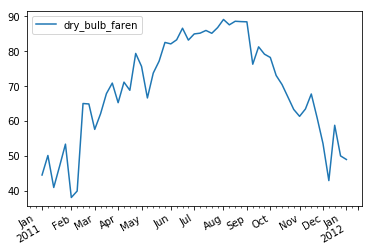

In [90]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
data = df_clean.loc[:,('visibility', 'dry_bulb_faren')]

weekly_mean = data.resample('W').mean()

# Print the output of weekly_mean.corr()
display(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()


### Daily hours of clear sky
In a previous exercise, you analyzed the `'sky_condition'` column to explore the difference in temperature on sunny days compared to overcast days. Recall that a `'sky_condition'` of `'CLR'` represents a sunny day. In this exercise, you will explore sunny days in greater detail. Specifically, you will use a box plot to visualize the fraction of days that are sunny.

The `'sky_condition'` column is recorded hourly. Your job is to resample this column appropriately such that you can extract the number of sunny hours in a day and the number of total hours. Then, you can divide the number of sunny hours by the number of total hours, and generate a box plot of the resulting fraction.

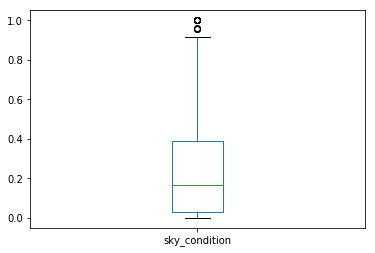

In [91]:
# Create a Boolean Series for sunny days: sunny
sunny = df_clean['sky_condition'] == 'CLR'

# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample('D').sum()

# Resample the Boolean Series by day and compute the count: total_hours
total_hours = sunny.resample('D').count()

# Divide sunny_hours by total_hours: sunny_fraction
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

### Heat or humidity
Dew point is a measure of relative humidity based on pressure and temperature. A dew point above 65 is considered uncomfortable while a temperature above 90 is also considered uncomfortable.

In this exercise, you will explore the maximum temperature and dew point of each month. The columns of interest are `'dew_point_faren'` and `'dry_bulb_faren'`. After resampling them appropriately to get the maximum temperature and dew point in each month, generate a histogram of these values as subplots. Uncomfortably, you will notice that the maximum dew point is above 65 every month!

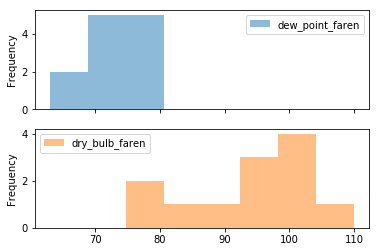

In [92]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean.loc[:,('dew_point_faren', 'dry_bulb_faren')].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

### Probability of high temperatures
We already know that 2011 was hotter than the climate normals for the previous thirty years. In this final exercise, you will compare the maximum temperature in August 2011 against that of the August 2010 climate normals. More specifically, you will use a CDF plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value. To do this, you will leverage the data manipulation, filtering, resampling, and visualization skills you have acquired throughout this course.

The two DataFrames df_clean and df_climate are available in the workspace. Your job is to select the maximum temperature in August in df_climate, and then maximum daily temperatures in August 2011. You will then filter out the days in August 2011 that were above the August 2010 maximum, and use this to construct a CDF plot.

Once you've generated the CDF, notice how it shows that there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!

95.3


C:\Users\Jacob\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


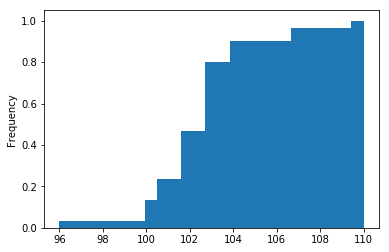

In [93]:
# From df_climate, extract the maximum temperature observed in August 2010. The relevant column here is 'Temperature'. 
# You can select the rows corresponding to August 2010 in multiple ways.
# For example, df_climate.loc['2011-Feb'] selects all rows corresponding to February 2011, 
#  while df_climate.loc['2009-09', 'Pressure'] selects the rows corresponding to September 2009 from the 'Pressure' column.
august_max = df_climate.loc['2010-08', 'Temperature'].max()
print(august_max)

# From df_clean, select the August 2011 temperature data from the 'dry_bulb_faren'. 
# Resample this data by day and aggregate the maximum value.
august_2011 = df_clean.loc['2011-08', 'dry_bulb_faren'].resample('D').max()

# Filter for days in august_2011 where the value exceeds august_max: august_2011_high
august_2011_high = august_2011[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', bins=25, normed=True, cumulative=True)

# Display the plot
plt.show()

